In [5]:
import sys
sys.executable

'/Users/mahipal/anaconda3/bin/python'

In [9]:
import tensorflow as tf

a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.multiply(a,b)

sess = tf.Session()

print(sess.run(y, feed_dict = {a:3,b:3}))

9.0


# Load some data and try around different things

In [10]:
data = tf.contrib.learn.datasets.mnist.load_mnist()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use a

# K-Means Algorithm 

In [18]:
#Genearte some random data points for clustering example
import numpy as np
num_puntos = 2000
conjunto_puntos = []
for i in range(num_puntos):
   if np.random.random() > 0.5:
     conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
   else:
     conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

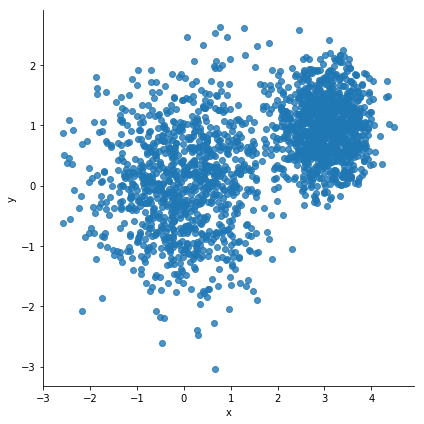

In [20]:
#Display the points that have been genearted randomly
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
        "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [30]:
#k-means implemenattion in tensorflow: 4 clusters
import numpy as np
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat([tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in range(k)],0)

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
   _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])


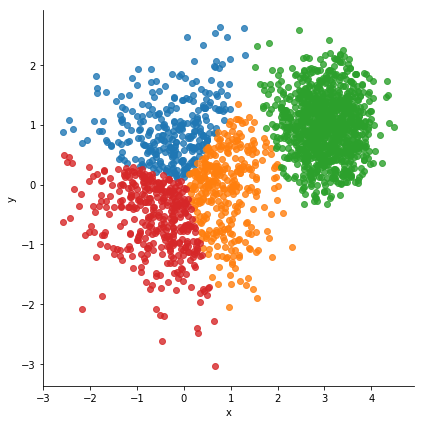

In [32]:
#check the result in assignment_values tensors
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
  data["x"].append(conjunto_puntos[i][0])
  data["y"].append(conjunto_puntos[i][1])
  data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [33]:
#Single layer Neural Network in tensorflow
mnist = tf.contrib.learn.datasets.mnist.load_mnist()

In [ ]:
#Create variables to contain weight and Bias
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [26]:
import tensorflow as tf
## build the graph
# first set up the parameters
m = tf.get_variable("m", [], initializer=tf.constant_initializer(0.))
b = tf.get_variable("b", [], initializer=tf.constant_initializer(0.))
init = tf.global_variables_initializer()

then set up the computations
input_placeholder = tf.placeholder(tf.float32)
output_placeholder = tf.placeholder(tf.float32)

x = input_placeholder
y = output_placeholder
y_guess = m * x + b

loss = tf.square(y - y_guess)

## finally, set up the optimizer and minimization node
optimizer = tf.train.GradientDescentOptimizer(1e-3)
train_op = optimizer.minimize(loss)

### start the session
sess = tf.Session()
sess.run(init)

### perform the training loop
import random

## set up problem
true_m = random.random()
true_b = random.random()

for update_i in range(10000):
  ## (1) get the input and output
  input_data = random.random()
  output_data = true_m * input_data + true_b

  ## (2), (3), and (4) all take place within a single call to sess.run()!
  _loss, _ = sess.run([loss, train_op], feed_dict={input_placeholder: input_data, output_placeholder: output_data})
  print(update_i, _loss)

### finally, print out the values we learned for our two variables
print("True parameters:     m=%.4f, b=%.4f" %(true_m, true_b))
print("Learned parameters:  m=%.4f, b=%.4f" %(tuple(sess.run([m, b]))))

0 0.90003026
1 0.74712354
2 1.4441794
3 1.3656749
4 0.68070334
5 1.2730544
6 0.90118766
7 0.8270263
8 1.0501418
9 1.2217926
10 0.87148076
11 0.97820544
12 0.8509359
13 0.8359302
14 1.303445
15 1.328022
16 1.2772586
17 1.1730084
18 1.2760334
19 0.85557187
20 0.8650321
21 1.2311133
22 1.1500864
23 0.68993264
24 1.0854876
25 0.6505541
26 0.6916828
27 0.86870265
28 1.2066709
29 0.79503995
30 0.73887724
31 0.8997568
32 0.83953774
33 0.8714118
34 0.65929466
35 1.0925746
36 0.73819506
37 0.71497345
38 0.99192494
39 0.69848174
40 0.7435824
41 0.971636
42 1.083658
43 0.682325
44 1.1192454
45 1.1362325
46 0.8871397
47 0.6029265
48 0.61223865
49 1.0235729
50 1.030636
51 0.7960188
52 1.0663835
53 0.82713497
54 1.02144
55 0.57823265
56 0.6166988
57 0.9217729
58 0.9570424
59 0.9773096
60 0.64158016
61 0.55334926
62 1.0089586
63 0.59755564
64 0.9349037
65 0.96036804
66 0.62577665
67 0.53152907
68 0.58632386
69 0.83321244
70 0.92769325
71 0.6596019
72 0.535639
73 0.8130907
74 0.53082323
75 0.7095949
7

In [28]:
#Simple examples
two_node = tf.constant(2)
three_node = tf.constant(3)
sum_node = two_node + three_node
sess = tf.Session()
print(sess.run(sum_node))


5


In [30]:
#inspect intermediate examples
two_node = tf.constant(2)
three_node = tf.constant(3)
sum_node = two_node + three_node
sess = tf.Session()
answer, inspection = sess.run([sum_node, [two_node, three_node]])
print(inspection)
print(answer)

[2, 3]
5
